<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/nhan_dien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien

/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien/Train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 540 images belonging to 9 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien/Validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 180 images belonging to 9 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 9 tín hiệu ra
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
17/17 [==============================] - 262s 15s/step - loss: 2.6422 - accuracy: 0.1019 - val_loss: 2.1915 - val_accuracy: 0.1889
Epoch 2/100
17/17 [==============================] - 49s 3s/step - loss: 2.1899 - accuracy: 0.1370 - val_loss: 2.1412 - val_accuracy: 0.3389
Epoch 3/100
17/17 [==============================] - 49s 3s/step - loss: 2.0854 - accuracy: 0.2204 - val_loss: 1.8942 - val_accuracy: 0.3222
Epoch 4/100
17/17 [==============================] - 50s 3s/step - loss: 1.7743 - accuracy: 0.3593 - val_loss: 1.6124 - val_accuracy: 0.4278
Epoch 5/100
17/17 [==============================] - 49s 3s/step - loss: 1.5605 - accuracy: 0.4056 - val_loss: 1.2694 - val_accuracy: 0.5889
Epoch 6/100
17/17 [==============================] - 50s 3s/step - loss: 1.3434 - accuracy: 0.5111 - val_loss: 1.1318 - val_accuracy: 0.5833
Epoch 7/100
17/17 [==============================] - 49s 3s/step - loss: 1.2415 - accuracy: 0.5259 - val_loss: 1.3588 - val_accuracy: 0.5056
Epoch 8/100

In [ ]:
# Lưu lại
model.save("nhan_dien_tien.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_tien.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.004735028371214867
Train Accuracy 0.9981481432914734


<function matplotlib.pyplot.show(*args, **kw)>

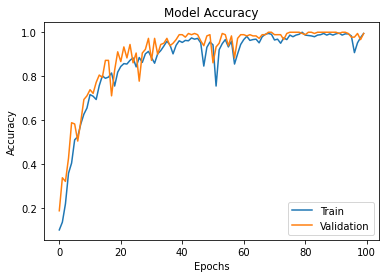

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D47B8850>
1/1 [==============================] - 0s 44ms/step
Menh gia tien: 10000 dong
Du lieu nam trong bo Test 1


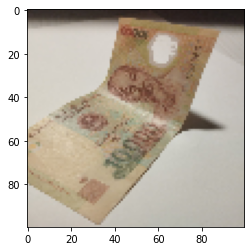

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4515210>
1/1 [==============================] - 0s 38ms/step
Menh gia tien: 50000 dong
Du lieu nam trong bo Test 1


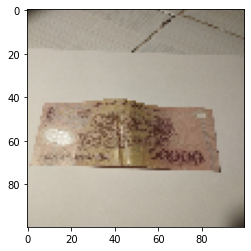

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4877F90>
1/1 [==============================] - 0s 38ms/step
Menh gia tien: 1000 dong
Du lieu nam trong bo Test 1


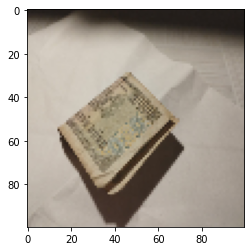

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D45F1650>
1/1 [==============================] - 0s 37ms/step
Menh gia tien: 2000 dong
Du lieu nam trong bo Test 1


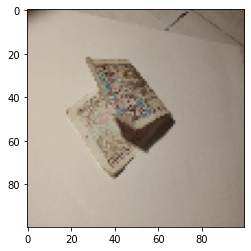

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D47D13D0>
1/1 [==============================] - 0s 40ms/step
Menh gia tien: 5000 dong
Du lieu nam trong bo Test 1


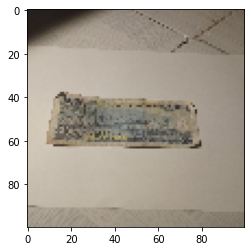

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D67AD350>
1/1 [==============================] - 0s 40ms/step
Menh gia tien: 100000 dong
Du lieu nam trong bo Test 1


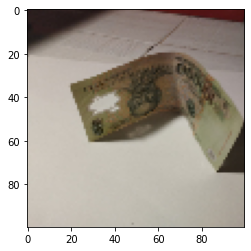

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4903FD0>
1/1 [==============================] - 0s 44ms/step
Menh gia tien: 500000 dong
Du lieu nam trong bo Test 1


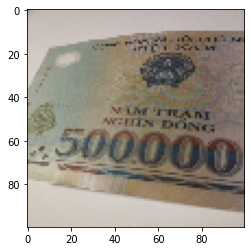

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4920E10>
1/1 [==============================] - 0s 46ms/step
Menh gia tien: 200000 dong
Du lieu nam trong bo Test 1


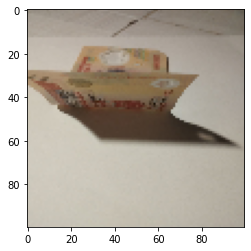

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4A1DD10>
1/1 [==============================] - 0s 41ms/step
Menh gia tien: 20000 dong
Du lieu nam trong bo Test 1


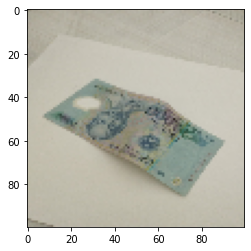

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D438B050>
1/1 [==============================] - 0s 42ms/step
Menh gia tien: 10000 dong
Du lieu nam trong bo Test 2


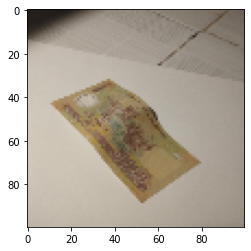

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D4C8D110>
1/1 [==============================] - 0s 41ms/step
Menh gia tien: 200000 dong
Du lieu nam trong bo Test 2


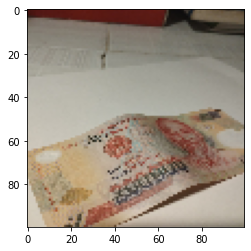

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D8844950>
1/1 [==============================] - 0s 39ms/step
Menh gia tien: 2000 dong
Du lieu nam trong bo Test 2


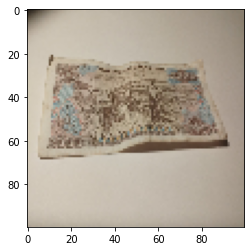

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D87C2C10>
1/1 [==============================] - 0s 38ms/step
Menh gia tien: 100000 dong
Du lieu nam trong bo Test 2


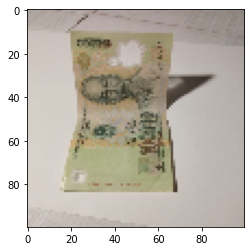

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D86DF250>
1/1 [==============================] - 0s 36ms/step
Menh gia tien: 50000 dong
Du lieu nam trong bo Test 2


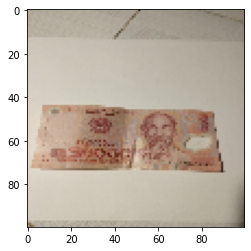

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D86B4710>
1/1 [==============================] - 0s 39ms/step
Menh gia tien: 5000 dong
Du lieu nam trong bo Test 2


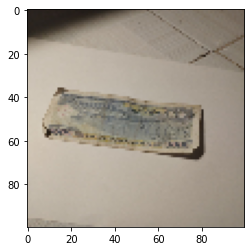

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D8751210>
1/1 [==============================] - 0s 40ms/step
Menh gia tien: 20000 dong
Du lieu nam trong bo Test 2


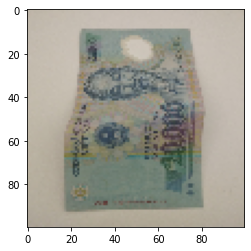

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D874FD50>
1/1 [==============================] - 0s 41ms/step
Menh gia tien: 500000 dong
Du lieu nam trong bo Test 2


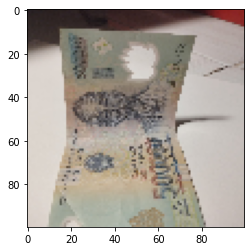

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FD5D46B17D0>
1/1 [==============================] - 0s 36ms/step
Menh gia tien: 1000 dong
Du lieu nam trong bo Test 2


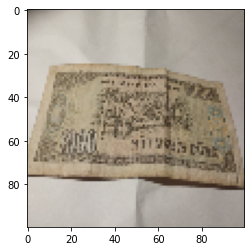

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien/Test/Test 1"
test2="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_tien/Test/Test 2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='100000 dong'
    if round(result[0][1])==1:
      prediction='10000 dong'
    if round(result[0][2])==1:
      prediction='1000 dong'
    if round(result[0][3])==1:
      prediction='200000 dong'
    if round(result[0][4])==1:
      prediction='20000 dong'
    if round(result[0][5])==1:
      prediction='2000 dong'
    if round(result[0][6])==1:
      prediction='500000 dong'
    if round(result[0][7])==1:
      prediction='50000 dong'
    if round(result[0][8])==1:
      prediction='5000 dong'
    print('Menh gia tien:',prediction)
    print(f'Du lieu nam trong bo Test {stt}')

    plt.show()